Our dataset comes from the Stack Overflow Developer Survey, an annual survey conducted by Stack Overflow, one of the largest online platforms for developers. Each year, the survey collects responses from tens of thousands of developers worldwide, providing insights into programming languages, tools, work environments, and emerging technologies.

For example, the 2024 survey gathered responses from over 65,000 developers across 185 countries between May 19 and June 20, 2024. The survey data is publicly available under the Open Database License (ODbL).

We obtained our dataset from the official survey at survey.stackoverflow.co.

The Stack Overflow Developer Survey 2024 is highly relevant to our research because it provides comprehensive insights into the skills, career motivations, frustrations, and job satisfaction of software developers worldwide. Our research focuses on improving hiring and retention strategies in the tech industry by identifying real-world indicators of developer success beyond traditional credentials. The survey’s data validates our central argument: technical ability alone does not define a strong developer—continuous learning, problem-solving, and workplace satisfaction are equally critical factors. The findings show that 82% of developers rely on self-directed learning, underscoring the importance of adaptability over static qualifications. Furthermore, the survey highlights key retention challenges, such as technical debt (the number-one frustration) and burnout from excessive workloads, reinforcing the idea that hiring the right developers must go beyond simple coding assessments. By leveraging this dataset, we can analyze trends that impact developer hiring and retention, providing data-driven strategies to help companies predict job success, reduce turnover, and build more resilient teams.

In [1]:
import requests
import zipfile
import io
import pandas as pd

def download_and_extract_csv(zip_url):
    """
    Downloads a ZIP file from `zip_url`, extracts the first .csv file found,
    and returns it as a Pandas DataFrame.
    """
    response = requests.get(zip_url)
    if response.status_code == 200:
        zip_content = io.BytesIO(response.content)
        
        with zipfile.ZipFile(zip_content, 'r') as zip_ref:
            for file_name in zip_ref.namelist():
                if file_name.endswith('.csv'):
                    with zip_ref.open(file_name) as csv_file:
                        df = pd.read_csv(csv_file)
                        return df
        # If no CSV is found in the ZIP, return None
        return None
    else:
        print(f"Failed to retrieve ZIP from {zip_url}")
        return None

# URLs of the ZIP files
csv_url_2024 = "https://cdn.sanity.io/files/jo7n4k8s/production/262f04c41d99fea692e0125c342e446782233fe4.zip/stack-overflow-developer-survey-2024.zip"
csv_url_2023 = "https://cdn.stackoverflow.co/files/jo7n4k8s/production/49915bfd46d0902c3564fd9a06b509d08a20488c.zip/stack-overflow-developer-survey-2023.zip"
csv_url_2022 = "https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2022.zip"
# Download and load each dataset
odf_2024 = download_and_extract_csv(csv_url_2024)
odf_2023 = download_and_extract_csv(csv_url_2023)
odf_2022 = download_and_extract_csv(csv_url_2022)

# Check if all DataFrames were loaded successfully
if odf_2024 is not None and odf_2023 is not None and odf_2022 is not None:
    print("All DataFrames loaded successfully.")
else:
    print("One or more DataFrames could not be loaded. Please check the URLs or network connection.")

All DataFrames loaded successfully.


In [2]:
odf_2024.columns = odf_2024.columns.str.upper().str.replace(" ", "")
odf_2023.columns = odf_2023.columns.str.upper().str.replace(" ", "")
odf_2022.columns = odf_2022.columns.str.upper().str.replace(" ", "")

with pd.option_context('display.max_rows', None):
    print(odf_2024.dtypes)

RESPONSEID                          int64
MAINBRANCH                         object
AGE                                object
EMPLOYMENT                         object
REMOTEWORK                         object
CHECK                              object
CODINGACTIVITIES                   object
EDLEVEL                            object
LEARNCODE                          object
LEARNCODEONLINE                    object
TECHDOC                            object
YEARSCODE                          object
YEARSCODEPRO                       object
DEVTYPE                            object
ORGSIZE                            object
PURCHASEINFLUENCE                  object
BUYNEWTOOL                         object
BUILDVSBUY                         object
TECHENDORSE                        object
COUNTRY                            object
CURRENCY                           object
COMPTOTAL                         float64
LANGUAGEHAVEWORKEDWITH             object
LANGUAGEWANTTOWORKWITH            

In [3]:
with pd.option_context('display.max_columns', None,
                       'display.max_rows', None,
                       'display.width', 6000):
    print(odf_2024.head(20))



    RESPONSEID                                         MAINBRANCH                 AGE                                         EMPLOYMENT                            REMOTEWORK   CHECK                                   CODINGACTIVITIES                                            EDLEVEL                                          LEARNCODE                                    LEARNCODEONLINE                                            TECHDOC YEARSCODE YEARSCODEPRO                  DEVTYPE ORGSIZE PURCHASEINFLUENCE BUYNEWTOOL BUILDVSBUY TECHENDORSE                                            COUNTRY CURRENCY  COMPTOTAL                             LANGUAGEHAVEWORKEDWITH                             LANGUAGEWANTTOWORKWITH                                    LANGUAGEADMIRED                             DATABASEHAVEWORKEDWITH                   DATABASEWANTTOWORKWITH                          DATABASEADMIRED                             PLATFORMHAVEWORKEDWITH                             PLATFORMWANTTOWORK

In [4]:
#DROPPING
#This question is a simple check tom make sure you are paying attention to the survey

# Filter rows where the "Check" column equals "Apples"
odf_2024 = odf_2024[odf_2024['CHECK'] == "Apples"]

# Drop the columns (note the column names are now capitalized)
cols_to_drop = [
    'CHECK',
    'TECHDOC',
    'PURCHASEINFLUENCE',
    'BUYNEWTOOL',
    'BUILDVSBUY',
    'TECHENDORSE',
    'LANGUAGEADMIRED',
    'LANGUAGEWANTTOWORKWITH',
    'DATABASEADMIRED',
    'DATABASEWANTTOWORKWITH',
    'PLATFORMADMIRED',
    'PLATFORMWANTTOWORKWITH',
    'WEBFRAMEADMIRED',
    'WEBFRAMEWANTTOWORKWITH',
    'EMBEDDEDADMIRED',
    'EMBEDDEDWANTTOWORKWITH',
    'TOOLSTECHADMIRED',
    'TOOLSTECHWANTTOWORKWITH',
    'MISCTECHADMIRED',
    'MISCTECHWANTTOWORKWITH',
    'NEWCOLLABTOOLSADMIRED',
    'NEWCOLLABTOOLSWANTTOWORKWITH',
    'OFFICESTACKASYNCADMIRED',
    'OFFICESTACKASYNCWANTTOWORKWITH',
    'OFFICESTACKSYNCHAVEWORKEDWITH',
    'AISEARCHDEVADMIRED',
    'AISEARCHDEVWANTTOWORKWITH',
    'SOCOMM',
    'KNOWLEDGE_5',
    'KNOWLEDGE_6',
    'KNOWLEDGE_8',
    'KNOWLEDGE_9',
    'SURVEYLENGTH',
    'SURVEYEASE',
    'CURRENCY',
    'COMPTOTAL',
    'RESPONSEID'
]

odf_2024 = odf_2024.drop(columns=cols_to_drop)

print(odf_2024.shape)


(65437, 77)


In [5]:
# Identify columns that are common to all three DataFrames
common_cols = set(odf_2024.columns).intersection(odf_2023.columns).intersection(odf_2022.columns)

# Subset each DataFrame to these common columns
df_2024 = odf_2024[list(common_cols)].copy()
df_2023 = odf_2023[list(common_cols)].copy()
df_2022 = odf_2022[list(common_cols)].copy()

# Add a "year" column to each DataFrame
df_2024["year"] = 2024
df_2023["year"] = 2023
df_2022["year"] = 2022

# Concatenate all DataFrames
combined_df = pd.concat([df_2024, df_2023, df_2022], ignore_index=True)

# Print out some info to verify
print("Combined DataFrame shape:", combined_df.shape)
print(combined_df.head())

# Print column data types and other info (optional)
with pd.option_context('display.max_rows', None):
    print(combined_df.dtypes)

Combined DataFrame shape: (227889, 44)
  OPSYSPROFESSIONALUSE TIMESEARCHING PROFESSIONALTECH FREQUENCY_3 REMOTEWORK  \
0                  NaN           NaN              NaN         NaN     Remote   
1                MacOS           NaN              NaN         NaN     Remote   
2              Windows           NaN              NaN         NaN     Remote   
3                  NaN           NaN              NaN         NaN        NaN   
4                  NaN           NaN              NaN         NaN        NaN   

  ORGSIZE  WORKEXP              SOPARTFREQ FREQUENCY_1  \
0     NaN      NaN                     NaN         NaN   
1     NaN     17.0  Multiple times per day         NaN   
2     NaN      NaN  Multiple times per day         NaN   
3     NaN      NaN                     NaN         NaN   
4     NaN      NaN  Multiple times per day         NaN   

                   ICORPM  ... KNOWLEDGE_4 OFFICESTACKSYNCWANTTOWORKWITH  \
0                     NaN  ...         NaN             

In [6]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

def encode_multi_select_columns(df):
    """
    This function:
      - Detects object-type columns with semicolon-separated values.
      - Splits these values into lists.
      - One-hot encodes the lists using MultiLabelBinarizer.
      - Drops the original columns and joins the new binary columns.
      - Converts column names to uppercase and drops any columns containing '_OTHER'.
      
    Parameters:
      df (pd.DataFrame): The input DataFrame.
      
    Returns:
      pd.DataFrame: The DataFrame after one-hot encoding multi-select columns.
    """
    print(f'Number of columns before encoding: {df.shape[1]}')
    
    # Determine which columns include multiple labels (semicolon-separated strings)
    multi_select_cols = []
    for col in df.select_dtypes(include='object').columns:
        if df[col].dropna().astype(str).str.contains(';').any():
            multi_select_cols.append(col)
    
    # One-hot encode the detected columns using MultiLabelBinarizer
    for col in multi_select_cols:
        # Get the raw column as strings, filling NaN with ''
        raw_col = df[col].fillna('').astype(str)
        
        # Split and strip each value into a list
        split_col = raw_col.apply(lambda x: [item.strip() for item in x.split(';')] if x else [])
        
        # Fit and transform with MultiLabelBinarizer
        mlb = MultiLabelBinarizer()
        encoded = mlb.fit_transform(split_col)
        
        # Create a DataFrame with meaningful column names
        encoded_df = pd.DataFrame(encoded, 
                                  columns=[f"{col}_{cls}" for cls in mlb.classes_],
                                  index=df.index)
        
        # Drop the original column before joining
        df.drop(columns=[col], inplace=True)
        
        # Join encoded columns back to the original DataFrame
        df = df.join(encoded_df)
    
    print(f'Number of columns after encoding: {df.shape[1]}')
    
    # Convert all column names to uppercase
    df.columns = df.columns.str.upper()
    
    # Drop columns that contain '_OTHER'
    df = df.drop(columns=[col for col in df.columns if '_OTHER' in col])
    
    print(f'Number of columns after dropping _OTHER: {df.shape[1]}')
    
    return df

encoded_2024 = encode_multi_select_columns(odf_2024)


Number of columns before encoding: 77
Number of columns after encoding: 648
Number of columns after dropping _OTHER: 628


In [7]:
with pd.option_context('display.max_columns', None,
                       'display.max_rows', None,
                       'display.width', 6000):
    print(encoded_2024.head(20))


                                           MAINBRANCH                 AGE                            REMOTEWORK                                            EDLEVEL YEARSCODE YEARSCODEPRO                  DEVTYPE ORGSIZE                                            COUNTRY                          SOVISITFREQ SOACCOUNT                           SOPARTFREQ                 AISELECT          AISENT                       AIACC                                      AICOMPLEX      AITHREAT TBRANCH                  ICORPM  WORKEXP     KNOWLEDGE_1                 KNOWLEDGE_2                 KNOWLEDGE_3 KNOWLEDGE_4 KNOWLEDGE_7       FREQUENCY_1        FREQUENCY_2        FREQUENCY_3         TIMESEARCHING         TIMEANSWERING                   PROFESSIONALCLOUD              PROFESSIONALQUESTION                    INDUSTRY  JOBSATPOINTS_1  JOBSATPOINTS_4  JOBSATPOINTS_5  JOBSATPOINTS_6  JOBSATPOINTS_7  JOBSATPOINTS_8  JOBSATPOINTS_9  JOBSATPOINTS_10  JOBSATPOINTS_11  CONVERTEDCOMPYEARLY  JOBSAT  EMPLO

In [8]:
# Create a new DataFrame dropping rows with NaN in CONVERTEDCOMPYEARLY
df_comp = encoded_2024.dropna(subset=['CONVERTEDCOMPYEARLY'])
print("New DataFrame shape:", df_comp.shape)



New DataFrame shape: (23435, 628)


In [9]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_comp['CONVERTEDCOMPYEARLY'].quantile(0.25)
Q3 = df_comp['CONVERTEDCOMPYEARLY'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_comp = df_comp[(df_comp['CONVERTEDCOMPYEARLY'] >= lower_bound) & (df_comp['CONVERTEDCOMPYEARLY'] <= upper_bound)]


In [10]:
import pandas as pd

# Ensure df_comp is your DataFrame with non-NaN compensation values in 'CONVERTEDCOMPYEARLY'
range_dict = {}

# Iterate over each column in df_comp
for col in df_comp.columns:
    # Check if the column is string-based (object type)
    if df_comp[col].dtype == 'object':
        # Drop rows where either the column or CONVERTEDCOMPYEARLY is NaN
        df_temp = df_comp.dropna(subset=[col, 'CONVERTEDCOMPYEARLY'])
        # Group by the column and compute the mean compensation for each group
        grouped_means = df_temp.groupby(col)['CONVERTEDCOMPYEARLY'].mean()
        # Only calculate the range if there is more than one group
        if len(grouped_means) > 1:
            comp_range = grouped_means.max() - grouped_means.min()
            range_dict[col] = comp_range

# Convert the dictionary to a pandas Series and sort by the range in descending order
range_series = pd.Series(range_dict).sort_values(ascending=False)
print("Columns sorted by compensation range (largest to smallest):")


Columns sorted by compensation range (largest to smallest):


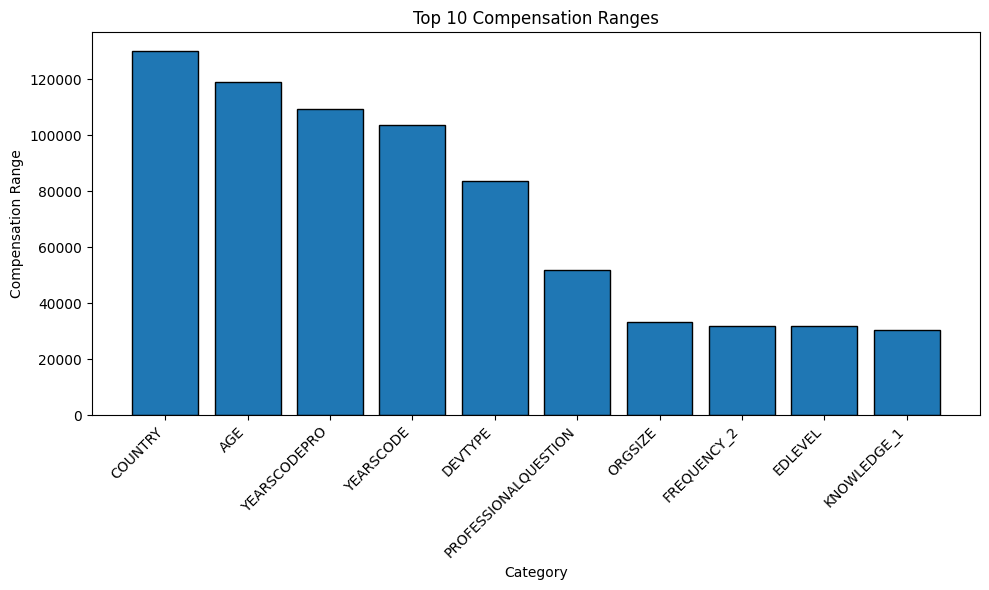

In [11]:
import matplotlib.pyplot as plt

top_10 = range_series.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10.index, top_10.values, edgecolor='black')
plt.title("Top 10 Compensation Ranges")
plt.xlabel("Category")
plt.ylabel("Compensation Range")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




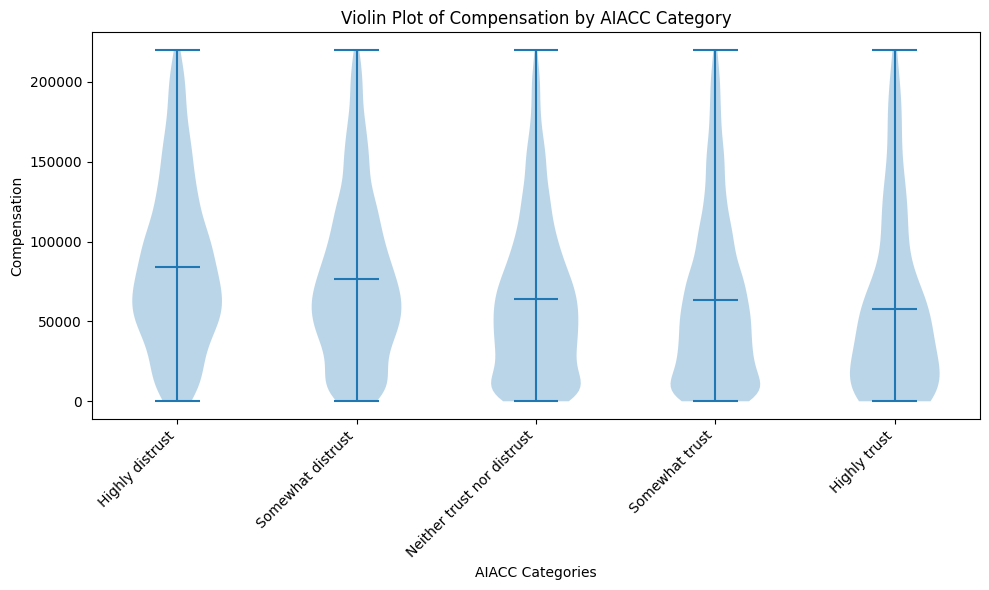

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define the desired order for the AIACC categories
order = ["Highly distrust", "Somewhat distrust", "Neither trust nor distrust", "Somewhat trust", "Highly trust"]

# Create a list of compensation data for each category in the specified order
data = [df_comp.loc[df_comp['AIACC'] == cat, 'CONVERTEDCOMPYEARLY'] for cat in order]

plt.figure(figsize=(10, 6))
plt.violinplot(data, showmeans=True)

# Set x-axis tick positions and labels
plt.xticks(ticks=np.arange(1, len(order) + 1), labels=order, rotation=45, ha='right')
plt.xlabel("AIACC Categories")
plt.ylabel("Compensation")
plt.title("Violin Plot of Compensation by AIACC Category")
plt.tight_layout()
plt.show()


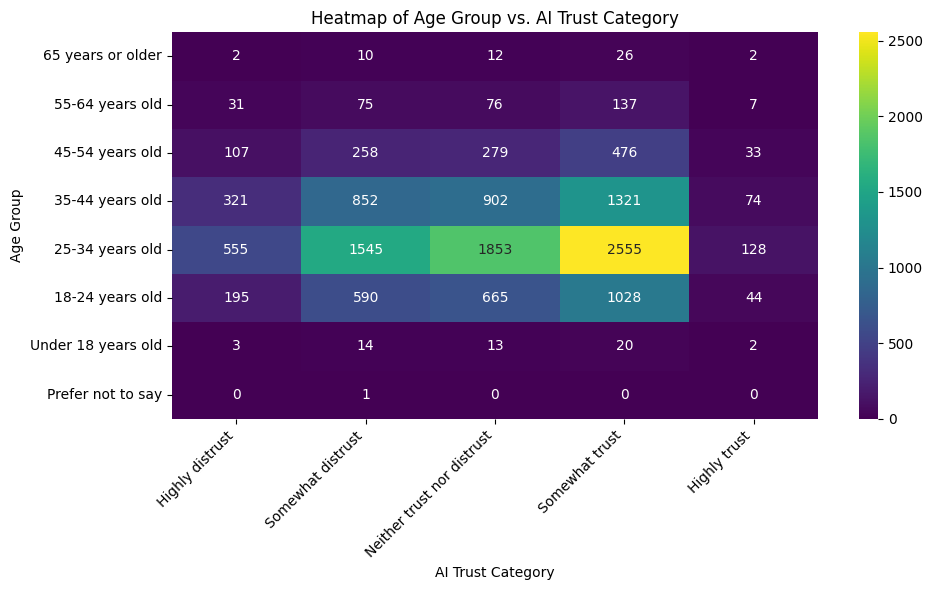

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define your custom orders
age_order = [
    "65 years or older",
    "55-64 years old",
    "45-54 years old",
    "35-44 years old",
    "25-34 years old",
    "18-24 years old",
    "Under 18 years old",
    "Prefer not to say"
]

trust_order = [
    "Highly distrust",
    "Somewhat distrust",
    "Neither trust nor distrust",
    "Somewhat trust",
    "Highly trust"
]

# Create the pivot table
heatmap_data = df_comp.pivot_table(
    index="AGE",       # Row labels
    columns="AIACC",   # Column labels
    aggfunc="size",    # Counting how many rows fall into each (AGE, AIACC) combo
    fill_value=0
)

# Reindex the rows and columns to match your desired orders
heatmap_data = heatmap_data.reindex(index=age_order)
heatmap_data = heatmap_data.reindex(columns=trust_order)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="viridis")
plt.title("Heatmap of Age Group vs. AI Trust Category")
plt.xlabel("AI Trust Category")
plt.ylabel("Age Group")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
def clean_and_split(val):
    if isinstance(val, str):
        if ';' in val:
            val = val.lower()
            return [item.strip() for item in val.split(';')].sort()
        else:
            val = val.lower()
            return val.strip()
    return val
odf_2024 = odf_2024.applymap(clean_and_split)
combined_df = combined_df.applymap(clean_and_split)

C:\Users\assaf\AppData\Local\Temp\ipykernel_16716\810499925.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  odf_2024 = odf_2024.applymap(clean_and_split)
C:\Users\assaf\AppData\Local\Temp\ipykernel_16716\810499925.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined_df = combined_df.applymap(clean_and_split)


Total respondents per year:
 year
2022    4507
2023    5361
2024    3713
dtype: int64
   year LANGUAGEHAVEWORKEDWITH  count  normalized
0  2022                    apl     59    0.013091
1  2022               assembly      4    0.000888
2  2022             bash/shell     38    0.008431
3  2022                      c     79    0.017528
4  2022                     c#    541    0.120036
5  2022                    c++    187    0.041491
6  2022                clojure     70    0.015531
7  2022                   dart    105    0.023297
8  2022                 delphi    277    0.061460
9  2022                 elixir     44    0.009763
Top 10 Languages Overall:
 Index(['python', 'c#', 'java', 'javascript', 'delphi', 'c++', 'swift',
       'kotlin', 'php', 'go'],
      dtype='object', name='LANGUAGEHAVEWORKEDWITH')
Pivot Table:
 year                        2022      2023      2024
LANGUAGEHAVEWORKEDWITH                              
c#                      0.120036  0.121060  0.121734
c++      

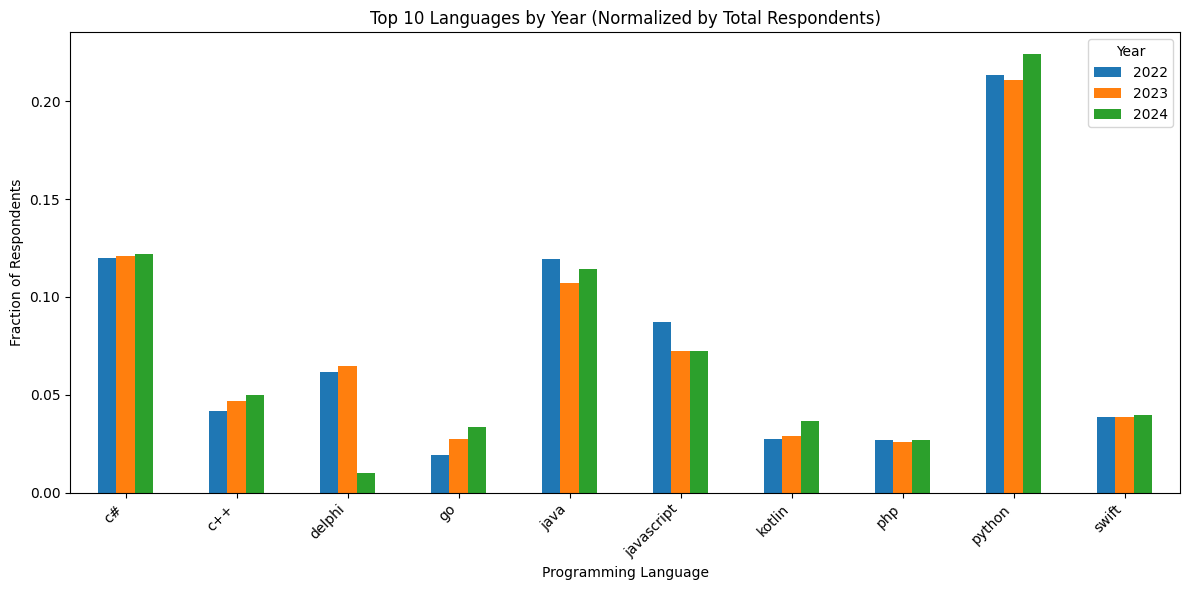

In [ ]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def parse_language_list(lang_value):
    """
    Custom parser for the LANGUAGEHAVEWORKEDWITH column.
    Expects values in the form "[html/css, javascript, typescript]" (without quotes)
    and returns a list of lowercased languages.
    """
    if pd.isna(lang_value):
        return []
    if isinstance(lang_value, str):
        lang_value = lang_value.strip()
        if lang_value.startswith("[") and lang_value.endswith("]"):
            inner = lang_value[1:-1].strip()
            if not inner:
                return []
            # Split by comma and strip spaces and any extraneous quotes
            parts = inner.split(",")
            parts = [part.strip().strip("'").strip('"').lower() for part in parts if part.strip()]
            return parts
        else:
            parts = lang_value.split(",")
            parts = [part.strip().strip("'").strip('"').lower() for part in parts if part.strip()]
            return parts
    return []

# Make a copy so we don't alter the original DataFrame
df = combined_df.copy()

# Parse the LANGUAGEHAVEWORKEDWITH column using the custom parser.
df['LANGUAGEHAVEWORKEDWITH'] = df['LANGUAGEHAVEWORKEDWITH'].apply(parse_language_list)

# Compute the total number of respondents per year that provided at least one language.
total_respondents = (
    df[df['LANGUAGEHAVEWORKEDWITH'].apply(lambda x: len(x) > 0)]
    .groupby('year')
    .size()
)
print("Total respondents per year:\n", total_respondents)

# Explode the column so that each row contains only one language.
df_exploded = df.explode('LANGUAGEHAVEWORKEDWITH')

# Group by year and language to count occurrences.
lang_counts = (
    df_exploded
    .groupby(['year', 'LANGUAGEHAVEWORKEDWITH'])
    .size()
    .reset_index(name='count')
)

# Normalize counts by the total respondents for each year.
lang_counts['normalized'] = lang_counts.apply(
    lambda row: row['count'] / total_respondents[row['year']], axis=1
)

# Quick check of the counts
print(lang_counts.head(10))

# Determine the top 10 languages overall based on raw counts.
top_10_langs_overall = (
    lang_counts
    .groupby('LANGUAGEHAVEWORKEDWITH')['count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)
print("Top 10 Languages Overall:\n", top_10_langs_overall)

# Filter the data to only include the top 10 languages.
top_lang_counts = lang_counts[lang_counts['LANGUAGEHAVEWORKEDWITH'].isin(top_10_langs_overall)]

# Pivot the table so that each row is a language and each column is a year (using normalized values).
pivot_df = (
    top_lang_counts
    .pivot(index='LANGUAGEHAVEWORKEDWITH', columns='year', values='normalized')
    .fillna(0)
)
print("Pivot Table:\n", pivot_df)

# ---- CHART: Grouped Bar Chart for the Top 10 Languages by Year (Normalized) ----
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='bar', ax=plt.gca())
plt.title("Top 10 Languages by Year (Normalized by Total Respondents)")
plt.xlabel("Programming Language")
plt.ylabel("Fraction of Respondents")
plt.legend(title="Year")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()